In [3]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "Matplotlib_HW/mouse_drug_data.csv"
clinical_data = "Matplotlib_HW/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv("../Matplotlib_HW/mouse_drug_data.csv")
mouse_df.head()

clinical_df = pd.read_csv("../Matplotlib_HW/clinicaltrial_data.csv")
clinical_df.head()

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_df, clinical_df, how = 'left', on = 'Mouse ID')


# Display the data table for preview
mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = mouse_clinical_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [5]:
tumor_mean = tumor_mean.reset_index()
tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = mouse_clinical_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_se = pd.DataFrame(tumor_se)

# Preview DataFrame
tumor_se.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
tumor_se = tumor_se.reset_index()
tumor_se

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_se_pivot = tumor_se.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

#mean_tumor_vol_pivot.reset_index(level = None, inplace = True)

#Preview the formatted table
tumor_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = tumor_mean.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

#Preview the formatted table
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


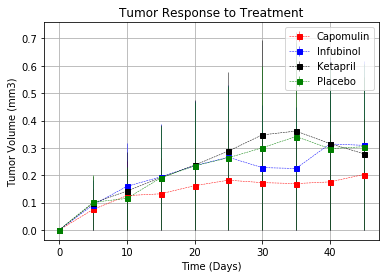

In [25]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_pivot.index, tumor_se_pivot ["Capomulin"], yerr=tumor_se_pivot["Capomulin"], 
             color="red", label="Capomulin", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_se_pivot ["Infubinol"], yerr=tumor_se_pivot["Infubinol"], 
             color="blue", label="Infubinol", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_se_pivot ["Ketapril"], yerr=tumor_se_pivot["Ketapril"], 
             color="black", label="Ketapril", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_pivot.index, tumor_se_pivot ["Placebo"], yerr=tumor_se_pivot["Placebo"], 
             color="green", label="Placebo", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(loc = "best", fontsize = "medium", fancybox = True)

# Save the Figure
plt.savefig("Tumor_response.png")

plt.show()

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = mouse_clinical_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_mean = pd.DataFrame(met_mean)

# Preview DataFrame
met_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [12]:
met_mean = met_mean.reset_index()
met_mean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = mouse_clinical_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_se = pd.DataFrame(met_se)

# Preview DataFrame
met_se

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [14]:
met_se = met_se.reset_index()
met_se

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [15]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_pivot = met_mean.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
tumor_met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [16]:
# Minor Data Munging to Re-Format the Data Frames
tumor_se_pivot = met_se.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
tumor_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


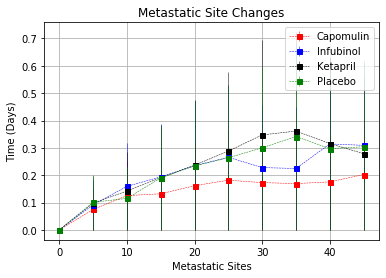

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_met_pivot.index, tumor_se_pivot ["Capomulin"], yerr=tumor_se_pivot["Capomulin"],
            color="red", label="Capomulin", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_pivot.index, tumor_se_pivot ["Infubinol"], yerr=tumor_se_pivot["Infubinol"],
            color="blue", label="Infubinol", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_pivot.index, tumor_se_pivot ["Ketapril"], yerr=tumor_se_pivot["Ketapril"],
            color="black", label="Ketapril", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_pivot.index, tumor_se_pivot ["Placebo"], yerr=tumor_se_pivot["Placebo"],
            color="green", label="Placebo", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Site Changes")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(True)
plt.legend(loc = "best", fontsize = "medium", fancybox = True)

# Save the Figure
plt.savefig("Metastatic_changes.png")

# Show the Figure
plt.show()

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_clinical_df.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame
mice_count = pd.DataFrame(mice_count["Mouse ID"])

# Preview DataFrame
mice_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [20]:
mice_count = mice_count.reset_index()
mice_count

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [21]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")

# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [22]:
#Calculate Percentages
survival_percentages = mice_count_pivot
survival_percentages["Capomulin Percentage"] = survival_percentages["Capomulin"]/survival_percentages["Capomulin"].iloc[0] * 100
survival_percentages["Infubinol Percentage"] = survival_percentages["Infubinol"]/survival_percentages["Infubinol"].iloc[0] * 100
survival_percentages["Ketapril Percentage"] = survival_percentages["Ketapril"]/survival_percentages["Ketapril"].iloc[0] * 100
survival_percentages["Placebo Percentage"] = survival_percentages["Placebo"]/survival_percentages["Placebo"].iloc[0] * 100

survival_percentages
    

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin Percentage,Infubinol Percentage,Ketapril Percentage,Placebo Percentage
Timepoint,,,,,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25,100.0,100.0,100.0,100.0
5,25,21,25,23,23,24,25,25,25,24,100.0,100.0,92.0,96.0
10,25,20,21,22,21,24,23,24,23,22,100.0,84.0,88.0,96.0
15,24,19,21,19,21,20,17,24,23,21,96.0,84.0,76.0,80.0
20,23,18,20,19,20,19,17,23,21,17,92.0,80.0,76.0,76.0
25,22,18,18,19,18,17,14,23,19,16,88.0,72.0,76.0,68.0
30,22,16,17,18,15,15,13,23,18,15,88.0,68.0,72.0,60.0
35,22,14,12,17,15,14,10,21,16,14,88.0,48.0,68.0,56.0
40,21,14,10,15,15,12,9,20,12,14,84.0,40.0,60.0,48.0


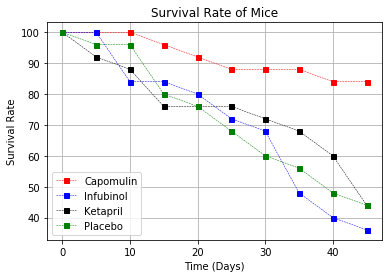

In [24]:
plt.plot(survival_percentages["Capomulin"]/survival_percentages["Capomulin"].iloc[0] * 100, color="red", label="Capomulin", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(survival_percentages["Infubinol"]/survival_percentages["Infubinol"].iloc[0] * 100, color="blue", label="Infubinol", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(survival_percentages["Ketapril"]/survival_percentages["Ketapril"].iloc[0] * 100, color="black", label="Ketapril", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(survival_percentages["Placebo"]/survival_percentages["Placebo"].iloc[0] * 100, color="green", label="Placebo", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Survival Rate of Mice")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate")
plt.grid(True)
plt.legend(loc = "best", fontsize = "medium", fancybox = True)

# Save the Figure
plt.savefig("Survival_rate.png")

plt.show()

In [26]:
# Calculate the percent changes for each drug
percent_change = (tumor_mean_pivot.loc[45]-tumor_mean_pivot.loc[0])/tumor_mean_pivot.loc[0] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

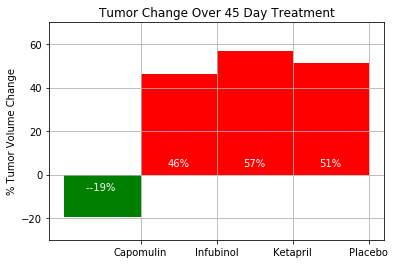

In [27]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = (percent_change["Capomulin"], 
                 percent_change["Infubinol"], 
                 percent_change["Ketapril"], 
                 percent_change["Placebo"])

fig, ax = plt.subplots()
ind = np.arange(len(percent_tuple))
width = 1
rectsPass = ax.bar(ind[0], percent_tuple[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_tuple[1:], width, color='red')
# Orient widths. Add labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure
fig.savefig("Percentage_Change.png")
# Show the Figure
fig.show()